In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\asmit\AppData\Local\Temp\ipykernel_11240\1570461447.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
df['text'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.groupby("category").describe()

text                                                            \
              count unique                                                top   
category                                                                        
business        510    503  economy  strong  in election year uk businesse...   
entertainment   386    369  ocean s twelve raids box office ocean s twelve...   
politics        417    403  super union  merger plan touted two of britain...   
sport           511    504  hantuchova in dubai last eight daniela hantuch...   
tech            401    347  california sets fines for spyware the makers o...   

                    
              freq  
category            
business         2  
entertainment    2  
politics         2  
sport            2  
tech             2

In [6]:
df['category'].describe()

count      2225
unique        5
top       sport
freq        511
Name: category, dtype: object

In [7]:
df["length"]=df['text'].apply(len)
df.head()

,category,text,length
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579


<Axes: ylabel='Frequency'>

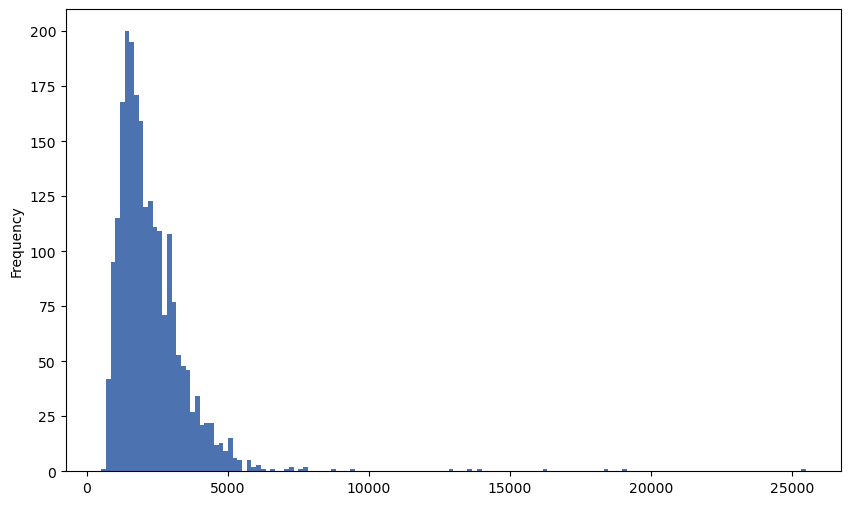

In [8]:
plt.figure(figsize=(10,6))
df['length'].plot.hist(bins=150)

In [9]:
df["length"].describe()

count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: length, dtype: float64

In [10]:
!pip install wordcloud


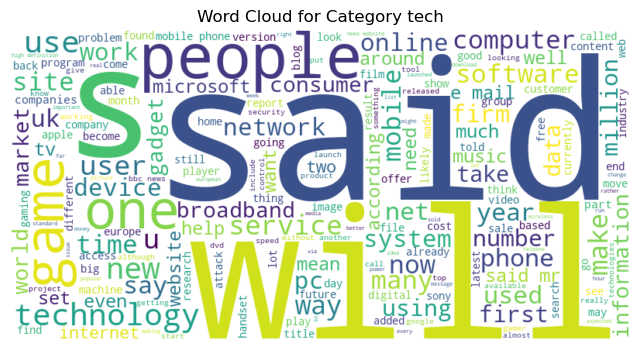

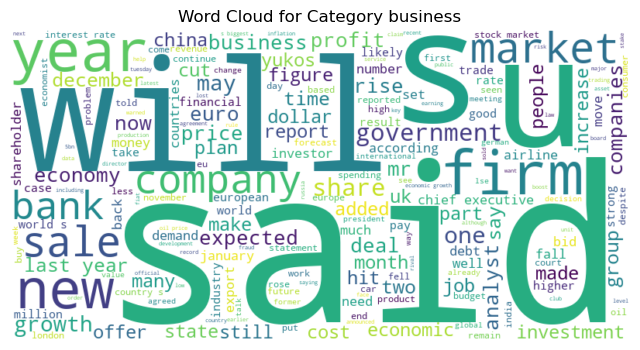

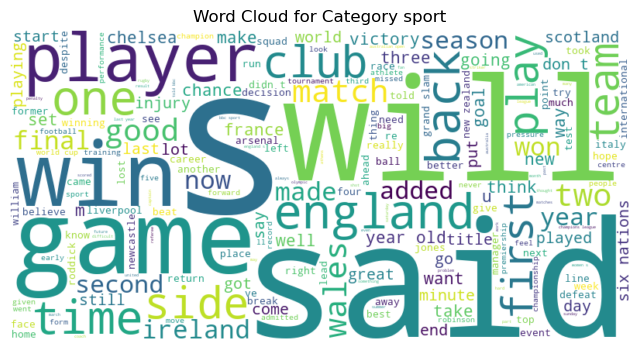

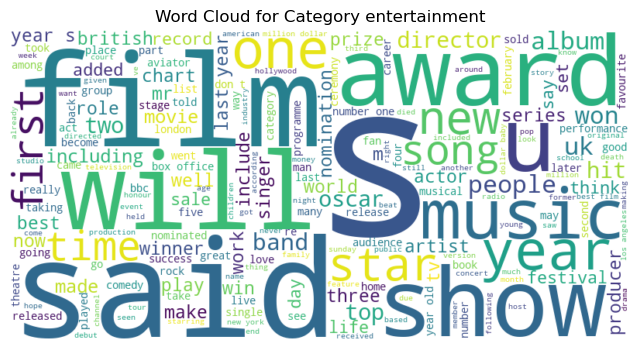

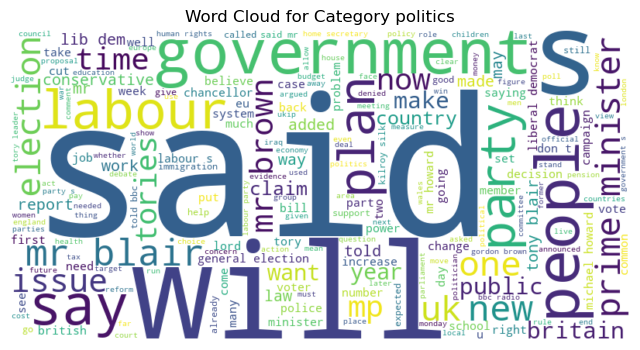

In [11]:
from wordcloud import WordCloud
text_data = df['text']
category_data = df['category']

# Create separate word clouds for each category
categories = category_data.unique()
for category in categories:
    text_corpus = ' '.join(text_data[category_data == category])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category {category}')
    plt.show()


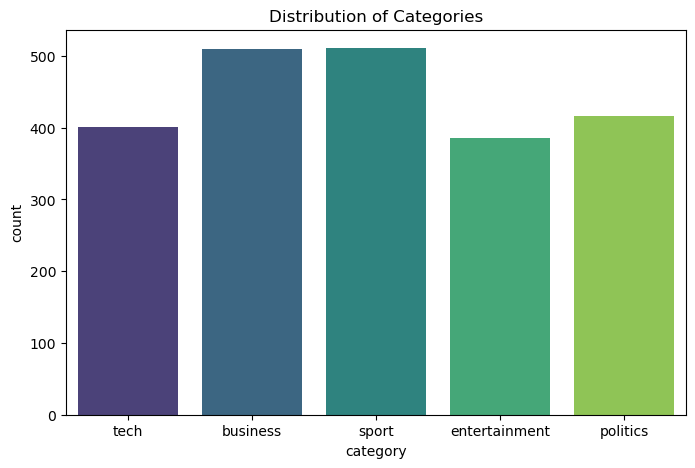

In [12]:
# Bar Chart for Categorical Data
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Distribution of Categories')
plt.show()


In [13]:
# # Count Plot for Categorical Data
# plt.figure(figsize=(10, 6), dpi=80)

# sns.countplot(x='category', hue='text', data=df, palette='Set2')
# plt.title('Count Plot of Categories and Text')
# plt.show()

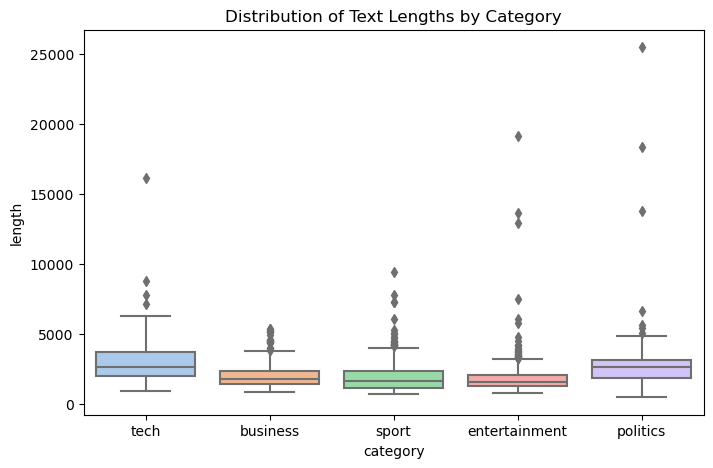

In [14]:
# Box Plot for Text Lengths
plt.figure(figsize=(8, 5))
sns.boxplot(x='category', y='length', data=df, palette='pastel')
plt.title('Distribution of Text Lengths by Category')
plt.show()

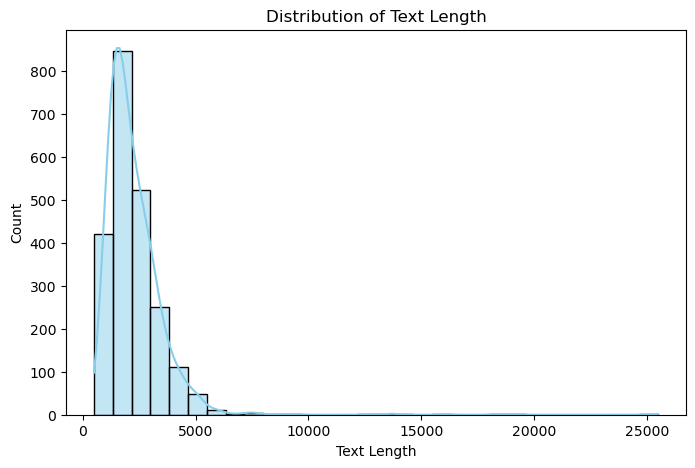

In [15]:
# Histogram for Text Length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.show()


In [16]:
import string
from nltk.corpus import stopwords


In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
mess=['''For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..''']

In [19]:
nonpunc=[i for i in mess if i not in string.punctuation]
nonpunc


["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def text_process(mess):
    #check character to see if they are in punctuation
    nonpunc=[char for char in mess if char not in string.punctuation]
    nonpunc="".join(nonpunc)
    return[word for word in nonpunc.split() if word.lower() not in stopwords.words("english")]


In [22]:
df["text"].apply(text_process)

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, exchats...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 2225, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


In [24]:
vow_transformer=CountVectorizer(analyzer=text_process).fit(df['text'])


In [25]:
vow_transformer.vocabulary_

{'tv': 30060,
 'future': 12857,
 'hands': 13983,
 'viewers': 31069,
 'home': 14680,
 'theatre': 29138,
 'systems': 28665,
 'plasma': 22278,
 'highdefinition': 14460,
 'tvs': 30067,
 'digital': 9404,
 'video': 31050,
 'recorders': 23995,
 'moving': 19652,
 'living': 17740,
 'room': 25155,
 'way': 31461,
 'people': 21852,
 'watch': 31427,
 'radically': 23594,
 'different': 9388,
 'five': 12145,
 'years': 32218,
 'time': 29381,
 'according': 2292,
 'expert': 11405,
 'panel': 21469,
 'gathered': 13019,
 'annual': 3230,
 'consumer': 7759,
 'electronics': 10546,
 'show': 26554,
 'las': 17169,
 'vegas': 30924,
 'discuss': 9579,
 'new': 20152,
 'technologies': 28915,
 'impact': 15225,
 'one': 20842,
 'favourite': 11774,
 'pastimes': 21645,
 'us': 30743,
 'leading': 17279,
 'trend': 29828,
 'programmes': 23088,
 'content': 7793,
 'delivered': 8994,
 'via': 31005,
 'networks': 20131,
 'cable': 5898,
 'satellite': 25567,
 'telecoms': 28952,
 'companies': 7378,
 'broadband': 5541,
 'service': 2619

In [26]:
print(len(vow_transformer.vocabulary_))


32955


In [27]:
message_vow=vow_transformer.transform(df["text"])
message_vow

<2225x32955 sparse matrix of type '<class 'numpy.int64'>'
	with 351196 stored elements in Compressed Sparse Row format>

In [28]:
print('Shape of Sparse Matrix:',message_vow.shape)
print('Amount of non_zero occurences:',message_vow.nnz)

Shape of Sparse Matrix: (2225, 32955)
Amount of non_zero occurences: 351196


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_vow)
tfidf4=tfidf_transformer.transform(message_vow)
print(tfidf4)

  (0, 32269)	0.037935187764147046
  (0, 32236)	0.02502710456830842
  (0, 32218)	0.033864397027638396
  (0, 32028)	0.03710594759218775
  (0, 31992)	0.02100667673046039
  (0, 31813)	0.03664812000393144
  (0, 31808)	0.09589102026311293
  (0, 31569)	0.01883413134132603
  (0, 31511)	0.02678740422843605
  (0, 31461)	0.03734874333099458
  (0, 31427)	0.136138533411439
  (0, 31347)	0.14814741780153445
  (0, 31069)	0.10864793656258968
  (0, 31068)	0.04861588905896267
  (0, 31050)	0.05626926860855512
  (0, 31020)	0.03695029588627538
  (0, 31005)	0.03145737594843765
  (0, 30924)	0.04141750597288596
  (0, 30764)	0.021827078427897984
  (0, 30743)	0.10694223933162789
  (0, 30718)	0.052098207267701584
  (0, 30204)	0.03992163146528098
  (0, 30183)	0.05650239402397808
  (0, 30069)	0.06175011629580761
  (0, 30067)	0.09245260244321195
  :	:
  (2224, 9895)	0.12109971024430365
  (2224, 8984)	0.11442471146497192
  (2224, 8820)	0.056428957311948434
  (2224, 8637)	0.09213091532167896
  (2224, 8460)	0.129959324

In [30]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(df['text'],df['category'],test_size=0.2,shuffle=True)
print(len(msg_train),len(msg_test),len(msg_train)+len(msg_test))


1780 445 2225


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC(probability=True)),  # train on TF-IDF vectors w/ SVM
])

In [32]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025C73908720>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SVC(probability=True))])

In [33]:
# Save the pipeline to a file
joblib.dump(pipeline, 'news_prediction_model.pkl')

['news_prediction_model.pkl']

In [34]:
predictions = pipeline.predict(msg_test)
predictions

array(['sport', 'tech', 'politics', 'entertainment', 'sport', 'sport',
       'tech', 'tech', 'tech', 'sport', 'entertainment', 'politics',
       'entertainment', 'politics', 'entertainment', 'business',
       'business', 'business', 'sport', 'tech', 'sport', 'business',
       'business', 'politics', 'politics', 'sport', 'sport', 'sport',
       'sport', 'politics', 'business', 'business', 'sport',
       'entertainment', 'tech', 'tech', 'business', 'tech', 'politics',
       'sport', 'sport', 'politics', 'sport', 'sport', 'tech', 'politics',
       'entertainment', 'business', 'business', 'politics', 'sport',
       'entertainment', 'sport', 'sport', 'sport', 'entertainment',
       'entertainment', 'entertainment', 'entertainment', 'politics',
       'sport', 'politics', 'tech', 'sport', 'sport', 'tech', 'politics',
       'sport', 'sport', 'business', 'politics', 'entertainment', 'sport',
       'politics', 'sport', 'entertainment', 'tech', 'tech', 'tech',
       'politics', 'tec

In [35]:
prediction = pipeline.predict(msg_train)
training_acc = accuracy_score(prediction, label_train)
print("Accuracy on training data:", training_acc)

Accuracy on training data: 1.0


In [36]:
# accuracy on test data
preyd = pipeline.predict(msg_test)
testing_acc = accuracy_score(preyd, label_test)
print("Accuracy on testing data:",testing_acc)

Accuracy on testing data: 0.9752808988764045


In [37]:
#Classification report
len(pipeline.predict(msg_train))
print(classification_report(label_test, pipeline.predict(msg_test)))
# print(confusion_matrix(label_test,model.predict(email_test)))

               precision    recall  f1-score   support

     business       0.98      0.95      0.96        83
entertainment       0.96      0.97      0.97        78
     politics       0.95      0.98      0.96        83
        sport       1.00      1.00      1.00       116
         tech       0.98      0.96      0.97        85

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



Text(0.5, 1.0, 'Accuracy Score: 0.9752808988764045')

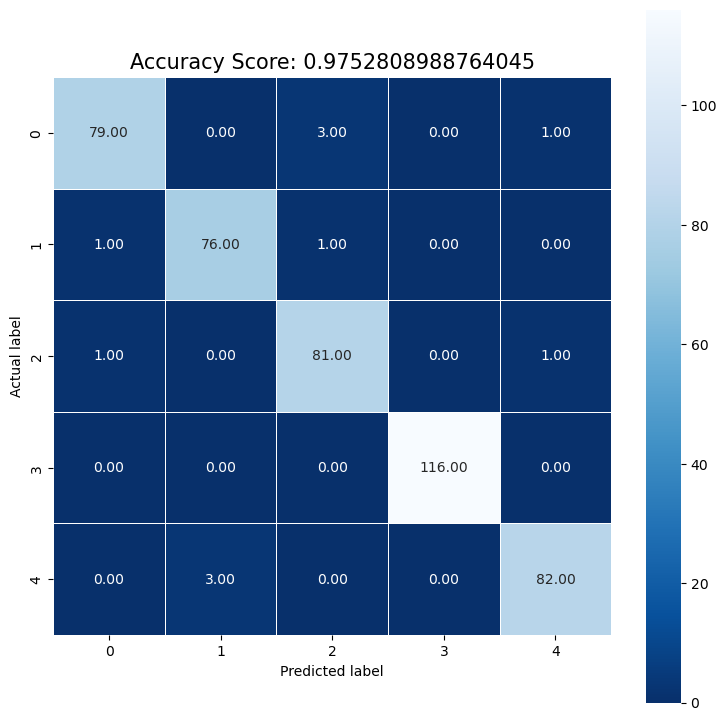

In [38]:
cm = confusion_matrix(label_test,pipeline.predict(msg_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.2f', linewidths=.7, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(label_test,pipeline.predict(msg_test)))
plt.title(all_sample_title,size=15)

In [39]:
# Create a DataFrame
comparison_df = pd.DataFrame({'Actual': label_test, 'Predicted': preyd})

# Display the DataFrame
print(comparison_df)


             Actual      Predicted
1316          sport          sport
158        politics           tech
1051       politics       politics
568   entertainment  entertainment
1642          sport          sport
...             ...            ...
2222  entertainment  entertainment
2118       politics       politics
131   entertainment  entertainment
589            tech           tech
1965          sport          sport

[445 rows x 2 columns]


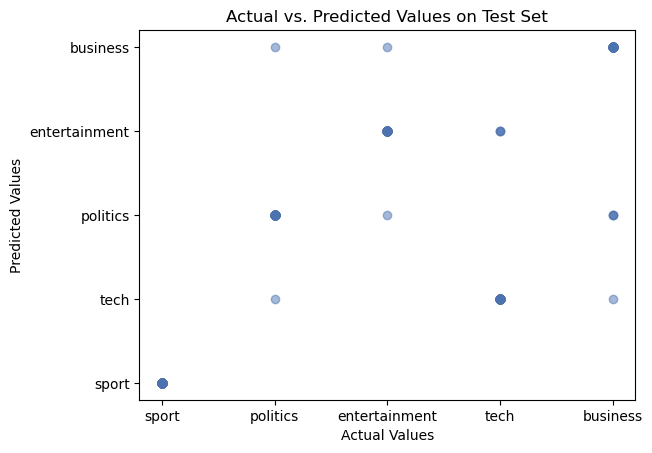

In [40]:
# Plotting actual vs. predicted values
plt.scatter(label_test, preyd, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values on Test Set")
plt.show()

In [41]:
df['text'][2]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

In [42]:
user_email = input("Enter an email: ")

# Tokenize and transform using CountVectorizer
bow = pipeline.named_steps['bow'].transform([user_email])
print("After CountVectorizer:", bow)

# Transform using TfidfTransformer
tfidf = pipeline.named_steps['tfidf'].transform(bow)
print("After TfidfTransformer:", tfidf)

# Make a prediction using the classifier
prediction = pipeline.named_steps['classifier'].predict(tfidf)
print("Prediction:", prediction)


Enter an email: tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   s